In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML

from multifile_lda import MultifileLDA

Create a new multifile LDA object and load the input files for beer1, 2, 3 (ignore the misleading filenames).

In [2]:
input_set = [
    ('input/beer3pos_fragments_1.csv', 'input/beer3pos_losses_1.csv', 'input/beer3pos_ms1_1.csv','input/beer3pos_ms2_1.csv'),
    ('input/beer3pos_fragments_2.csv', 'input/beer3pos_losses_2.csv', 'input/beer3pos_ms1_2.csv','input/beer3pos_ms2_2.csv'),
    ('input/beer3pos_fragments_3.csv', 'input/beer3pos_losses_3.csv', 'input/beer3pos_ms1_3.csv','input/beer3pos_ms2_3.csv')
]

Load and normalise data the same way as before in the single-file version: within each fragmentation spectrum, we divide the MS2 intensities by the max MS2 intensity in the same spectrum and multiplying by *scaling_factor*. Let's call this normalisation method 1.

In [3]:
scaling_factor=100
lda = MultifileLDA()
lda.load_all(input_set, scaling_factor, 1)

Loading file 0 data shape (700, 2604)
Loading file 1 data shape (808, 2604)
Loading file 2 data shape (737, 2604)


Run multifile LDA on all the 3 files.

In [4]:
K = 300
n_samples = 20
n_burn = 0
n_thin = 1
alpha = 50.0/K
beta = 0.1
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 ......................................................................
 - file 1 .................................................................................
 - file 2 ..........................................................................

Using Numpy for multi-file LDA sampling
Sample 1 ..............................................
Sample 2 ..............................................
Sample 3 ..............................................
Sample 4 ..............................................
Sample 5 ..............................................
Sample 6 ..............................................
Sample 7 ..............................................
Sample 8 ..............................................
Sample 9 ..............................................
Sample 10 ..............................................
Sample 11 ..............................................
Sample 12 ..............................................
Sample 13 ..

So, in this model, each file has its own document-topic distributions, but we have a topic-word distribution shared across files. We print these out.

In [5]:
lda.do_thresholding(th_doc_topic=0.05, th_topic_word=0.01)

In [6]:
print lda.thresholded_topic_word.shape
print len(lda.ms1s[0])
print len(lda.ms1s[1])
print len(lda.ms1s[2])
print len(lda.vocab)

(300, 2604)
700
808
737
2604


In [7]:
lda.print_top_words()

Mass2Motif 0: loss_103.02694 (0.156), loss_173.06872 (0.089), fragment_74.06037 (0.053), loss_197.08975 (0.048), loss_17.02628 (0.044), fragment_248.11299 (0.043), loss_159.08931 (0.038), loss_44.02594 (0.035), loss_77.08393 (0.028), loss_144.06269 (0.028), loss_142.07391 (0.023), loss_110.02124 (0.018), loss_137.06868 (0.014), loss_129.0787 (0.014), loss_128.03167 (0.013), fragment_98.06001 (0.013), loss_91.06319 (0.013), loss_184.0581 (0.013), loss_92.01047 (0.013), fragment_192.06435 (0.011), loss_66.03167 (0.011), fragment_258.10969 (0.010), loss_73.01584 (0.010),

Mass2Motif 1: loss_162.05208 (0.266), loss_59.07314 (0.197), loss_162.05319 (0.064), fragment_97.02839 (0.047), loss_87.03169 (0.036), loss_64.01503 (0.031), loss_105.07777 (0.025), fragment_305.13764 (0.025), loss_105.04248 (0.024), loss_59.04845 (0.024), loss_59.03644 (0.024), loss_106.02645 (0.020), loss_74.00031 (0.020), fragment_130.05055 (0.018), fragment_238.07133 (0.011), fragment_68.04934 (0.011),

Mass2Motif 2:

,file,M2M,alpha
0,0,24,-1.775638e-15
1,0,58,3.773469e-03
2,1,24,-5.351866e-16
3,1,58,6.305759e-04
4,2,24,1.198617e-02
5,2,58,1.361854e-03


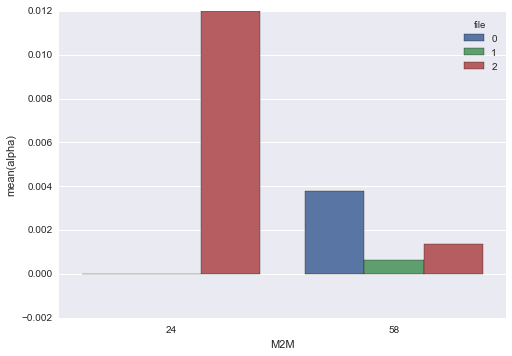

In [8]:
interesting = [
    24, # M2M 52
    58, # M2M 230
    # M2M 124, 142, 294
]
lda.plot_e_alphas(interesting)

,file,M2M,degree
0,0,24,0
1,0,58,5
2,1,24,0
3,1,58,1
4,2,24,34
5,2,58,2


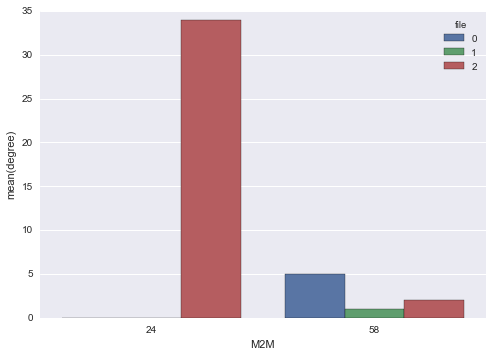

In [10]:
lda.plot_motif_degrees(interesting)